
3. Combine the two above ideas to study the average terminal wealth for different values of $p$.


In [ ]:
w0 <- 100 # Initial wealth
p <- 0.5 # Probability of a win
T <- 10000  # Terminal time

# Create empty objects to fill
w <- rep(0, T+1)
x <- rep(0, T)

# Fill initial wealth
w[1] = w0

for(t in 1:T){
    # A random draw
    u <- runif(1)
    if(u <= 1 - p){
        x[t] <- 0
        w[t+1] <- w[t] - 1
    } else {
        x[t] <- 1
        w[t+1] <- w[t] + 1
    }
}
time = 0:T
plot(time, w, type='l')

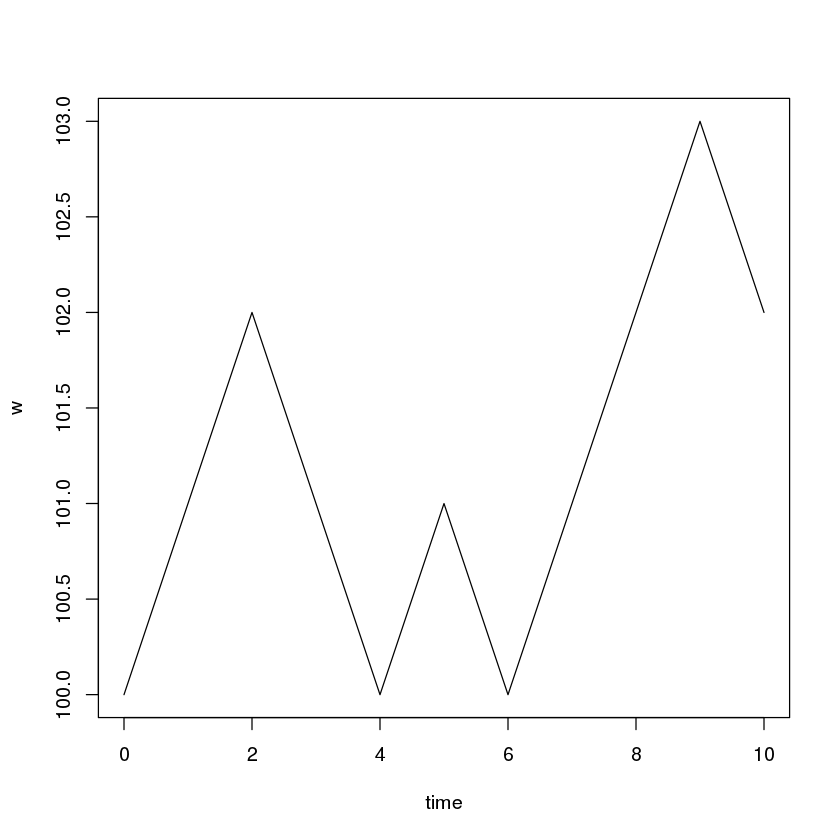

In [52]:
# Re-write the above code to loop over different values of $p$ and plot all of the lines on a single graph.

# Define a step size
step <- 0.5
p <- seq(0, 1.0, step)
p <- p[-1]
p <- p[-length(p)]
w0 <- 100 # Initial wealth
T <- 10  # Terminal time
N <- length(p)

# Create empty objects to fill
w <- rep(0, N*(T+1))
x <- rep(0, N*T)
w <- matrix(w, nrow=T+1, ncol=N)
x <- matrix(x, nrow=T, ncol=N)

# Fill initial wealth
for(n in 1:N){
    w[1, n] <- w0
}

for(n in 1:N){
    for(t in 1:T){
        # A random draw
        u <- runif(1)
        if(u <= 1 - p[n]){
            x[t, n] <- 0
            w[t+1, n] <- w[t, n] - 1
        } else {
            x[t, n] <- 1
            w[t+1, n] <- w[t, n] + 1
        }
    }
}
time = 0:T
matplot(time, w, type='l')

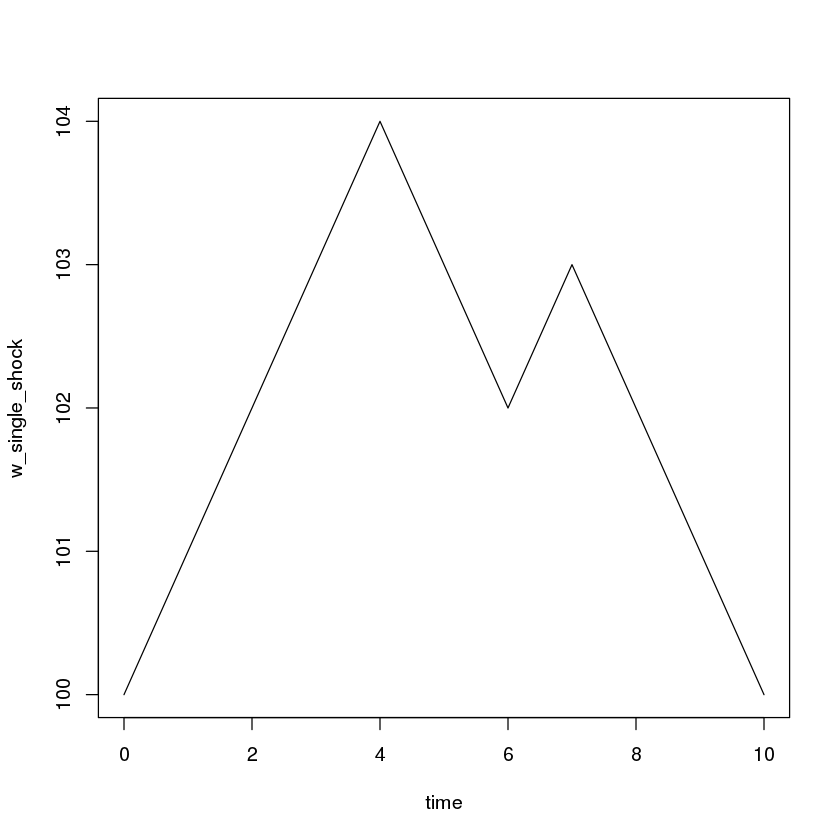

In [51]:
# Re-write the code to use different values of $p$, but **the same** random shocks each period.

# Define a step size
step <- 0.5
p <- seq(0, 1.0, step)
p <- p[-1]
p <- p[-length(p)]
w0 <- 100 # Initial wealth
T <- 10  # Terminal time
N <- length(p)

# Create empty objects to fill
w_single_shock <- rep(0, N*(T+1))
x <- rep(0, N*T)
w_single_shock <- matrix(w_single_shock, nrow=T+1, ncol=N)
x <- matrix(x, nrow=T, ncol=N)

# Draw a single uniform vector
u <- runif(T)

# Fill initial wealth
for(n in 1:N){
    w_single_shock[1, n] <- w0
}

for(n in 1:N){
    for(t in 1:T){
        if(u[t] <= 1 - p[n]){
            x[t, n] <- 0
            w_single_shock[t+1, n] <- w_single_shock[t, n] - 1
        } else {
            x[t, n] <- 1
            w_single_shock[t+1, n] <- w_single_shock[t, n] + 1
        }
    }
}
time = 0:T
matplot(time, w_single_shock, type='l')

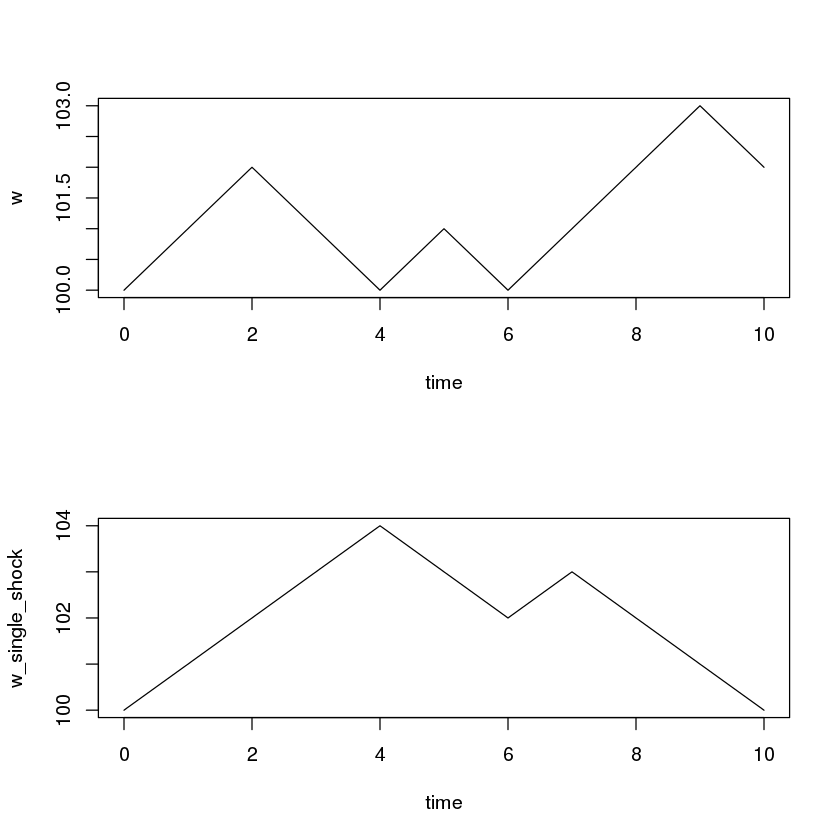

In [54]:
# Plot all the different paths for numbers 1 and 2 on together on two subplots.
par(mfrow=c(2, 1))
matplot(time, w, type='l')
matplot(time, w_single_shock, type='l')

[1] "Average wealth at time T = 1000 over 100 simulations when p = 0.5 is 102.1 ."

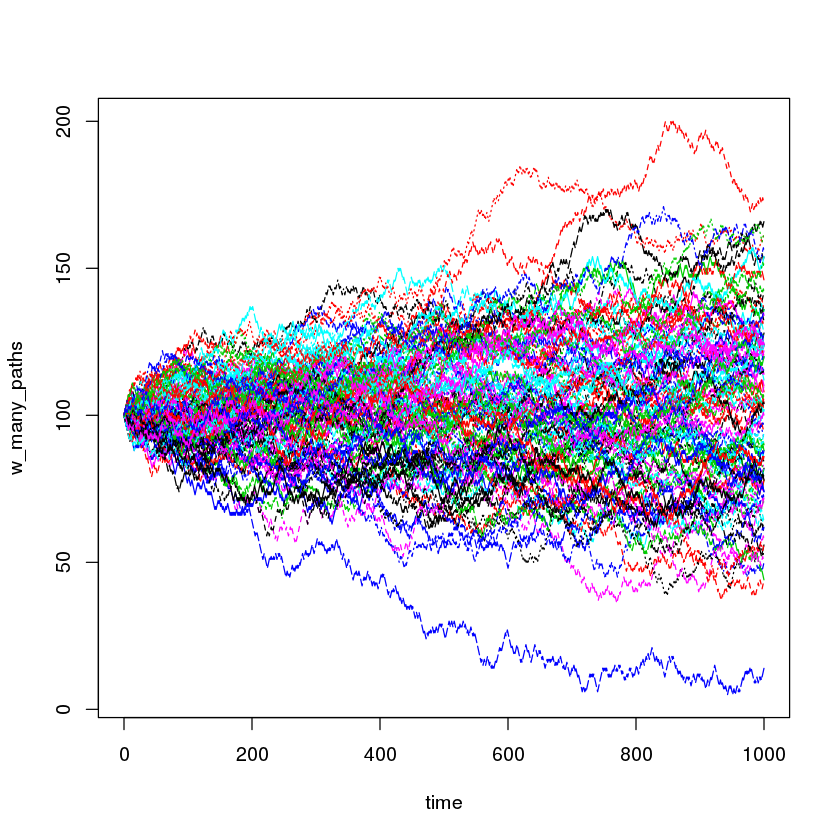

In [64]:
# Re-write the above code to simulate many realizations of the 
# terminal wealth for a single value of $p$ and take the average 
# $\frac{1}{M} \sum_m w_m(T)$ where $M$ is the number of simulations.

# Define a number of simulation
M <- 100

p <- 0.5
w0 <- 100 # Initial wealth
T <- 1000  # Terminal time

# Create empty objects to fill
w_many_paths <- rep(0, M*(T+1))
x <- rep(0, M*T)
w_many_paths <- matrix(w_many_paths, nrow=T+1, ncol=M)
x <- matrix(x, nrow=T, ncol=M)

# Draw a uniform matrix
u <- runif(T*M)
u <- matrix(u, nrow=T, ncol=M)

# Fill initial wealth
for(m in 1:M){
    w_many_paths[1, m] <- w0
}

for(m in 1:M){
    for(t in 1:T){
        if(u[t, m] <= 1 - p){
            x[t, m] <- 0
            w_many_paths[t+1, m] <- w_many_paths[t, m] - 1
        } else {
            x[t, m] <- 1
            w_many_paths[t+1, m] <- w_many_paths[t, m] + 1
        }
    }
}

# Calculate average terminal wealth
w_term_bar = 0.0
for(m in 1:M){
    w_term_bar = w_term_bar + w_many_paths[T+1, m]
}
w_term_bar = w_term_bar/M
sprintf("Average wealth at time T = %d over %s simulations when p = %s is %s .",
        T, M, p, w_term_bar)
time = 0:T
matplot(time, w_many_paths, type='l')

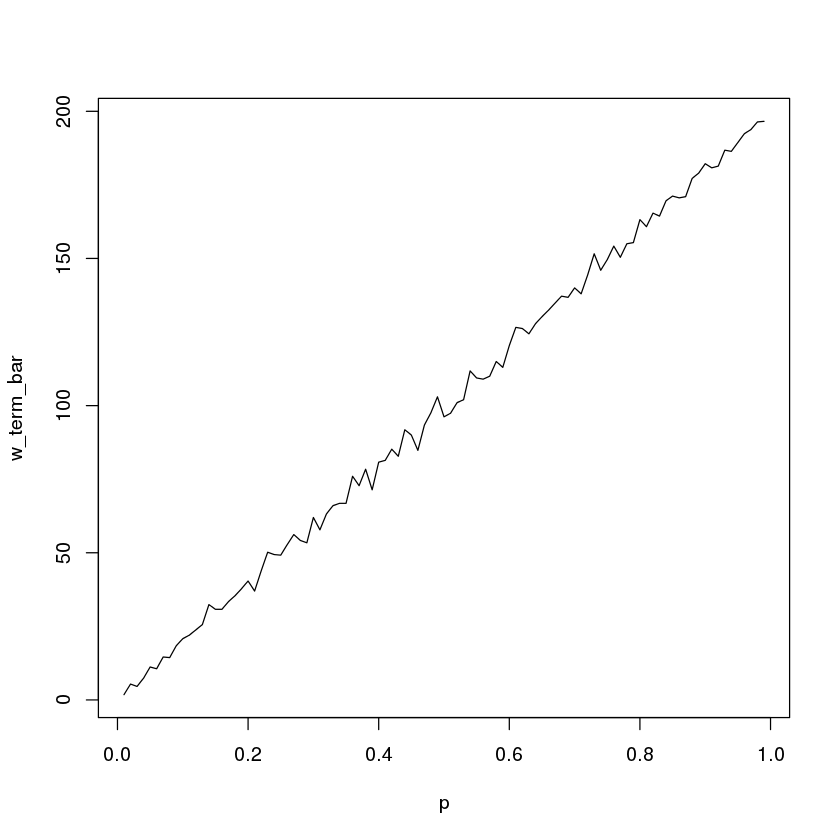

In [78]:
# Combine the two above ideas to study the average terminal wealth for different values of $p$.

# Define a number of simulation
M <- 10

# Define a vector of success probabilities
step <- 0.01
p <- seq(0, 1.0, step)
p <- p[-1]
p <- p[-length(p)]
N <- length(p)

w0 <- 100 # Initial wealth
T <- 100  # Terminal time

# Create empty objects to fill
W <- rep(0, N*M*(T+1))
x <- rep(0, N*M*T)
W <- array(w_many_paths, dim=c(T+1,M,N))
x <- array(x, dim=c(T,M,N))

# Draw a uniform array
u <- runif(N*T*M)
u <- array(u, dim=c(T,M,N))


# Fill initial wealth
for(m in 1:M){
    W[1, m,] <- w0*rep(1, N)
}

for(n in 1:N){
    for(m in 1:M){
        for(t in 1:T){
            if(u[t, m, n] <= 1 - p[n]){
                x[t, m, n] <- 0
                W[t+1, m, n] <- W[t, m, n] - 1
            } else {
                x[t, m, n] <- 1
                W[t+1, m, n] <- W[t, m, n] + 1
            }
        }
    }
}

# Calculate average terminal wealth
w_term_bar = rep(0, N)
for(n in 1:N){
    for(m in 1:M){
        w_term_bar[n] = w_term_bar[n] + W[T+1, m, n]
    }
    w_term_bar[n] = w_term_bar[n]/M
    #print(sprintf("Average wealth at time T = %d over %s simulations when p = %s is %s .",
    #              T, M, p, w_term_bar))
}
#time = 0:T
plot(p, w_term_bar, type='l')

In [96]:
x[t,,][!t_index] <- 1
x[t,,][!t_index]

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1

[1] 3
[1] 3


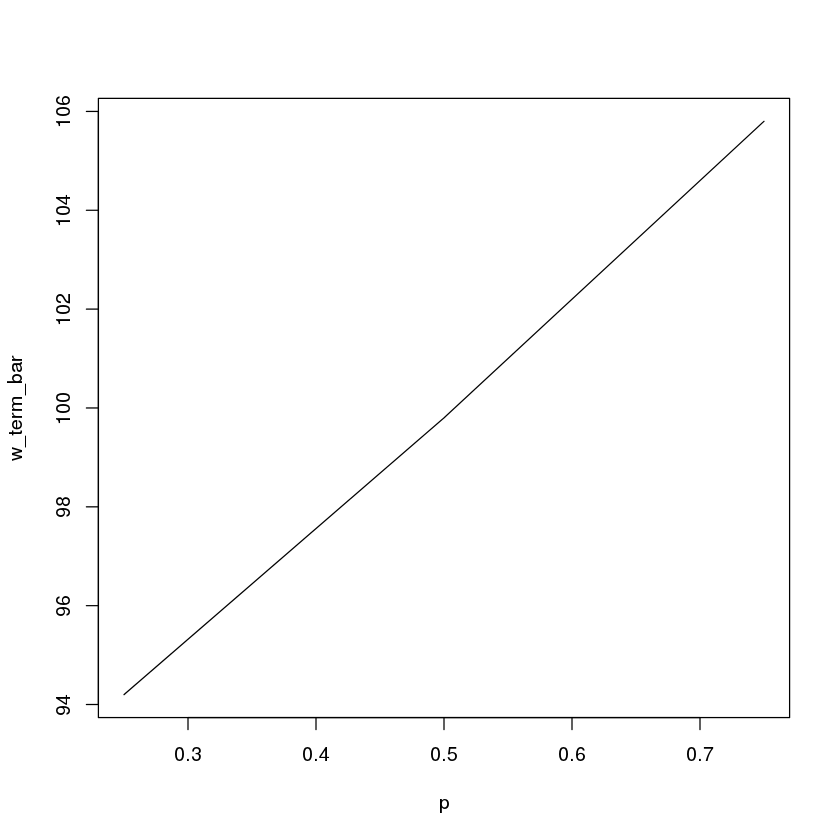

In [121]:
# If you want to be a cool kid (or a nerd, they're pretty much the same thing),
# vectorize the above loops so that there are no for statements.

# Define a number of simulation
M <- 10

# Define a vector of success probabilities
step <- 0.25
p <- seq(0, 1.0, step)
p <- p[-1]
p <- p[-length(p)]
N <- length(p)

w0 <- 100 # Initial wealth
T <- 10  # Terminal time

# Create empty objects to fill
W <- rep(0, N*M*(T+1))
x <- rep(0, N*M*T)
W <- array(w_many_paths, dim=c(T+1,M,N))
x <- array(x, dim=c(T,M,N))

# Draw a uniform array
u <- runif(N*T*M)
u <- array(u, dim=c(T,M,N))


# NOTE: R does not offer an easy method for array inversion, but
# if you are really saavy, you might be able to vectorize even this loop.
# Fill initial wealth
W[1,,] <- w0*outer(rep(1, M), rep(1, N))

for(t in 1:T){
    t_index <- u[t,,] <= outer(rep(1, M),rep(1, N) - p)
    x[t,,][!t_index] <- 1
    W[t+1,,] <- W[t,,] + 2*x[t,,] - 1
}

# Calculate average terminal wealth
w_term_bar <- colSums(W[T+1,,])/M

#time = 0:T
plot(p, w_term_bar, type='l')